# Diffusion

This notebook illustrates the classification of the nodes of a graph by [diffusion](https://scikit-network.readthedocs.io/en/latest/reference/classification.html), based on the labels of a few nodes.

In [ ]:
from IPython.display import SVG

In [1]:
import numpy as np
import sknetwork as skn

In [ ]:
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.diffusion import DiffusionClassifier, BiDiffusionClassifier
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph

## Undirected graphs

**Loading**

In [3]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency
position = graph.position
labels_true = graph.labels

**Classification**

In [4]:
seeds = {i: labels_true[i] for i in [0, 33]}

In [5]:
diffusion = DiffusionClassifier()
labels_pred = diffusion.fit_transform(adjacency, seeds)

In [6]:
precision = np.round(np.mean(labels_pred == labels_true), 2)
precision

0.97

**Visualization**

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:402: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(alpha, collections.Iterable):
/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


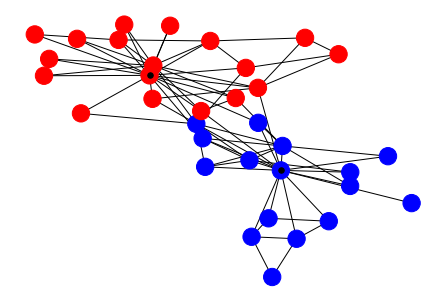

In [9]:
image = svg_graph(adjacency, position, labels=labels_pred)

## Directed graphs

**Loading**

In [10]:
graph = skn.data.painters(metadata=True)
adjacency = graph.adjacency
names = graph.names

**Classification**

In [11]:
rembrandt = 5
klimt = 6
cezanne = 11
seeds = {cezanne: 0, rembrandt: 1, klimt: 2}

In [12]:
diffusion = skn.classification.DiffusionClassifier()
labels = diffusion.fit_transform(adjacency, seeds)

**Visualization**

In [13]:
graph = nx.from_scipy_sparse_matrix(adjacency)

In [14]:
pos = nx.spring_layout(graph)

In [22]:
seeds

{11: 0, 5: 1, 6: 2}

In [26]:
names

array(['Pablo Picasso', 'Claude Monet', 'Michelangelo', 'Edouard Manet',
       'Peter Paul Rubens', 'Rembrandt', 'Gustav Klimt', 'Edgar Degas',
       'Vincent van Gogh', 'Leonardo da Vinci', 'Henri Matisse',
       'Paul Cezanne', 'Pierre-Auguste Renoir', 'Egon Schiele'],
      dtype='<U21')

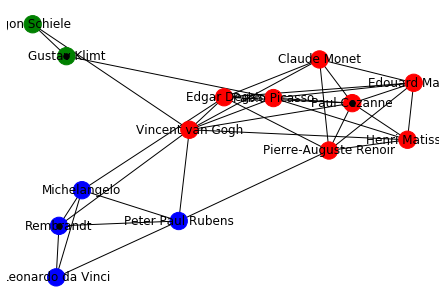

In [29]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos, node_color=COLORS[labels], labels={i: name for i, name in enumerate(names)})
nx.draw_networkx_nodes(graph, pos, nodelist=list(seeds.keys()), node_color='k', node_size=30)

## Bipartite graphs

**Loading**

In [30]:
graph = skn.data.movie_actor(metadata=True)
biadjacency = graph.biadjacency
movies = graph.names_row
actors = graph.names_col

**Ranking**

In [31]:
inception = 0
drive = 3
budapest = 8

In [32]:
seeds = {inception: 0, drive: 1, budapest: 2}

In [33]:
bidiffusion = skn.classification.BiDiffusionClassifier()
labels = bidiffusion.fit_transform(biadjacency, seeds)

In [34]:
[movies[i] for i, l in enumerate(labels) if l == seeds[budapest]]

['The Grand Budapest Hotel',
 'Aviator',
 '007 Spectre',
 'Inglourious Basterds',
 'Midnight In Paris',
 'Murder on the Orient Express',
 'Fantastic Beasts 2']